In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pandas as pd


In [4]:
x_dt = np.linspace(0.0,10.0,1000000)


In [5]:
noise = np.random.randn(1000000)

In [6]:
y_tr = (0.5 * x_dt) + 5 + noise

In [7]:
x_df = pd.DataFrame(data= x_dt,columns = ['x_data'])

In [8]:
y_df = pd.DataFrame(data= y_tr,columns = ['y_data'])

In [9]:
x_df.head()

,x_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [11]:
my_data.head()

,x_data,y_data
0,0.00000,4.834276
1,0.00001,5.291240
2,0.00002,3.979233
3,0.00003,3.060247
4,0.00004,5.092885


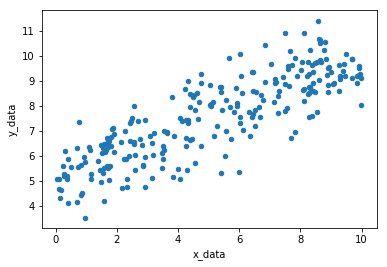

In [14]:
my_data.sample(n = 250).plot(kind ='scatter',x='x_data',y='y_data')

In [15]:
batch = 16
rand = np.random.rand(2)
rand

array([0.3481258 , 0.49516544])

In [16]:
m = tf.Variable(0.03854426)
b = tf.Variable(0.40798026)

In [17]:
x_in = tf.placeholder(tf.float32,[batch])
y_in = tf.placeholder(tf.float32,[batch])

In [18]:
y_line = m*x_in + b

In [19]:
loss = tf.reduce_sum(tf.square(y_in-y_line))

In [20]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [21]:
train = opt.minimize(loss)

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000

    for i in range(batches):
        rand_ind = np.random.randint(len(x_dt),size = batch)
        
        feed = {x_in:x_dt[rand_ind],y_in:y_tr[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    m_fit,b_fit = sess.run(([m,b]))
    
    

In [24]:
y_pl = x_dt*m_fit + b_fit

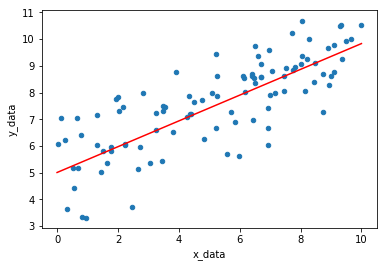

In [27]:
my_data.sample(100).plot(kind='scatter',x = 'x_data',y='y_data')
plt.plot(x_dt,y_pl,'r')

 ## TF Estimator API

In [28]:
feat = [tf.feature_column.numeric_column(key='x',shape=[1])]

In [29]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_global_id_in_cluster': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc4dcbdcba8>, '_experimental_distribute': None, '_train_distribute': None, '_model_dir': '/tmp/tmp6m6amn_w', '_eval_distribute': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_device_fn': None, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_master': '', '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_protocol': None, '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_evaluation_master': '', '_task_id': 0, '_is_chief': True, '_task_type': 'worker', '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
}


In [30]:
from sklearn.model_selection import train_test_split


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_dt,y_tr,test_size=0.3,random_state=101)

In [32]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [33]:
train_input_function = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [34]:
eval_input_function = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [35]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp6m6amn_w/model.ckpt.
INFO:tensorflow:loss = 464.41846, step = 1
INFO:tensorflow:global_step/sec: 736.711
INFO:tensorflow:loss = 22.855146, step = 101 (0.136 sec)
INFO:tensorflow:global_step/sec: 1068.75
INFO:tensorflow:loss = 30.329506, step = 201 (0.094 sec)
INFO:tensorflow:global_step/sec: 921.961
INFO:tensorflow:loss = 20.414434, step = 301 (0.108 sec)
INFO:tensorflow:global_step/sec: 960.252
INFO:tensorflow:loss = 23.306355, step = 401 (0.104 sec)
INFO

In [36]:
train_met = estimator.evaluate(input_fn=train_input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-08-18:18:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6m6amn_w/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-08-18:18:04
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0593945, global_step = 1000, label/mean = 7.494196, loss = 8.475156, prediction/mean = 7.3478665
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [37]:
eval_metrics = estimator.evaluate(input_fn=eval_input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-08-18:18:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6m6amn_w/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-08-18:18:06
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0916524, global_step = 1000, label/mean = 7.4868197, loss = 8.733219, prediction/mean = 7.326859
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [38]:
print('Training Metrics')
print(train_met)

Training Metrics
{'label/mean': 7.494196, 'prediction/mean': 7.3478665, 'global_step': 1000, 'average_loss': 1.0593945, 'loss': 8.475156}


In [39]:
print('Evaluation Metrics')
print(eval_metrics)

Evaluation Metrics
{'label/mean': 7.4868197, 'prediction/mean': 7.326859, 'global_step': 1000, 'average_loss': 1.0916524, 'loss': 8.733219}


In [40]:
new_data = np.linspace(0,10,10)


input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)

In [41]:
preds = list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6m6amn_w/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [42]:
preds

[{'predictions': array([4.4387956], dtype=float32)},
 {'predictions': array([5.0849648], dtype=float32)},
 {'predictions': array([5.7311344], dtype=float32)},
 {'predictions': array([6.3773036], dtype=float32)},
 {'predictions': array([7.023473], dtype=float32)},
 {'predictions': array([7.669642], dtype=float32)},
 {'predictions': array([8.315811], dtype=float32)},
 {'predictions': array([8.961981], dtype=float32)},
 {'predictions': array([9.6081505], dtype=float32)},
 {'predictions': array([10.25432], dtype=float32)}]

In [43]:
predicts = []

for pred in preds:
    predicts.append(pred['predictions'])

In [44]:
predicts

[array([4.4387956], dtype=float32),
 array([5.0849648], dtype=float32),
 array([5.7311344], dtype=float32),
 array([6.3773036], dtype=float32),
 array([7.023473], dtype=float32),
 array([7.669642], dtype=float32),
 array([8.315811], dtype=float32),
 array([8.961981], dtype=float32),
 array([9.6081505], dtype=float32),
 array([10.25432], dtype=float32)]

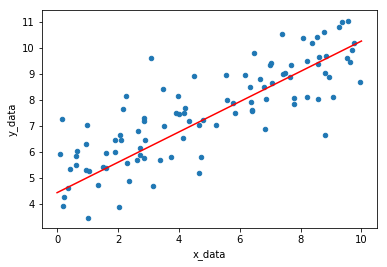

In [54]:
my_data.sample(n=100).plot(kind = 'scatter',x='x_data',y='y_data')
plt.plot(new_data,predicts,'r')

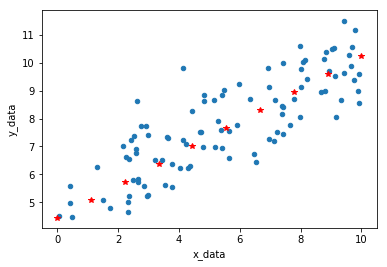

In [57]:
my_data.sample(n=100).plot(kind = 'scatter',x='x_data',y='y_data')
plt.plot(new_data,predicts,'r*')

In [58]:
my_data['y_data'].shape

(1000000,)